In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df=pd.read_excel("titanic.xlsx")

In [3]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
df.isnull()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.notnull()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,True,True,True,True,True,True,True,True,True,False,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,False,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,False,True,True,True,True,False,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [8]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [9]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [10]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [11]:
df1=df.copy()

In [12]:
df1.Age=df.Age.fillna(df.Age.mean())

In [13]:
df1

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.000000,7.2500,0
1,1,female,38.000000,71.2833,1
2,3,female,26.000000,7.9250,1
3,1,female,35.000000,53.1000,1
4,3,male,35.000000,8.0500,0
...,...,...,...,...,...
886,2,male,27.000000,13.0000,0
887,1,female,19.000000,30.0000,1
888,3,female,29.699118,23.4500,0
889,1,male,26.000000,30.0000,1


In [14]:
dummies=pd.get_dummies(df1.Sex)

In [15]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [16]:
df2=pd.concat([df1,dummies],axis='columns')

In [17]:
df2

,Pclass,Sex,Age,Fare,Survived,female,male
0,3,male,22.000000,7.2500,0,0,1
1,1,female,38.000000,71.2833,1,1,0
2,3,female,26.000000,7.9250,1,1,0
3,1,female,35.000000,53.1000,1,1,0
4,3,male,35.000000,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,male,27.000000,13.0000,0,0,1
887,1,female,19.000000,30.0000,1,1,0
888,3,female,29.699118,23.4500,0,1,0
889,1,male,26.000000,30.0000,1,0,1


In [18]:
df2.drop(['female','male'],axis=1,inplace=True)

In [19]:
df2

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.000000,7.2500,0
1,1,female,38.000000,71.2833,1
2,3,female,26.000000,7.9250,1
3,1,female,35.000000,53.1000,1
4,3,male,35.000000,8.0500,0
...,...,...,...,...,...
886,2,male,27.000000,13.0000,0
887,1,female,19.000000,30.0000,1
888,3,female,29.699118,23.4500,0
889,1,male,26.000000,30.0000,1


In [20]:
df2.Sex=df2.Sex.map({'female':0,'male':1})

In [21]:
df2

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.000000,7.2500,0
1,1,0,38.000000,71.2833,1
2,3,0,26.000000,7.9250,1
3,1,0,35.000000,53.1000,1
4,3,1,35.000000,8.0500,0
...,...,...,...,...,...
886,2,1,27.000000,13.0000,0
887,1,0,19.000000,30.0000,1
888,3,0,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [22]:
target=df2.Survived

In [23]:
xt=df2.drop(['Survived'],axis=1)

In [24]:
xt

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(xt,target,test_size=0.2)


In [27]:
len(xtrain)

712

In [28]:
len(xtest)

179

In [29]:
len(xt)

891

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
NB=GaussianNB()

In [32]:
NB.fit(xtrain,ytrain)

GaussianNB()

In [33]:
y_Predict=NB.predict(xtest)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc_score=accuracy_score(ytest,y_Predict)

In [36]:
NB.score(xtest,ytest)

0.7653631284916201

In [37]:
acc_score

0.7653631284916201

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [39]:
cm = confusion_matrix(ytest, y_Predict)
print(cm)

[[90 23]
 [19 47]]


In [43]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 656.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 1.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 3.2 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use upda

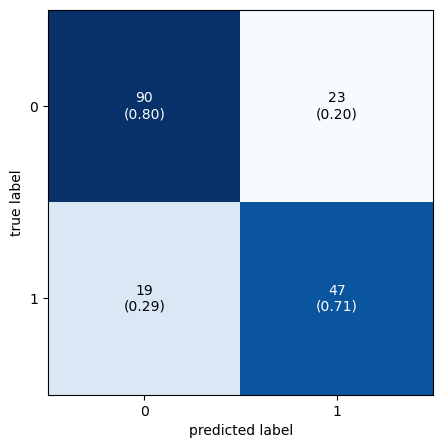

In [45]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()